In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
final_df=pd.read_csv('Final Results\PPCA\Robust Scaler Predictions.csv')

In [58]:
rmse_1 = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['LSTM_Prediction']))
rmse_2 = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['XGRegressor_Prediction']))
mae_1 = mean_absolute_error(final_df['Actual Predictions'], final_df['LSTM_Prediction'])
mae_2 = mean_absolute_error(final_df['Actual Predictions'], final_df['XGRegressor_Prediction'])
r2_1 = r2_score(final_df['Actual Predictions'], final_df['LSTM_Prediction'])
r2_2 = r2_score(final_df['Actual Predictions'], final_df['XGRegressor_Prediction'])

In [59]:
# Calculate weights based on inverse of RMSE
weight_1 = 1 / (1 + rmse_1)
weight_2 = 1 / (25 + rmse_2)

# weight_1=0.5
# weight_2=0.5

# Normalize weights
total_weight = weight_1 + weight_2
weight_1 /= total_weight
weight_2 /= total_weight



In [60]:
final_df['Average']= final_df['LSTM_Prediction']*weight_1 + final_df['XGRegressor_Prediction'] * weight_2
final_df

,Actual Predictions,LSTM_Prediction,XGRegressor_Prediction,Average
0,203.25,116.882385,161.61317,132.362466
1,221.00,205.078830,192.83072,200.840100
2,144.50,165.648830,194.68652,175.697967
3,76.50,100.948920,132.54300,111.882753
4,50.75,53.235508,77.40996,61.601614
...,...,...,...,...
5142,316.25,353.664430,356.19354,354.539685
5143,397.75,354.310240,401.69183,370.707691
5144,471.50,440.186550,455.67148,445.545454
5145,500.00,436.616300,556.59875,478.138891


In [61]:
rmse_combined = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['Average']))
mae_combined = mean_absolute_error(final_df['Actual Predictions'], final_df['Average'])
r2_combined=r2_score(final_df['Actual Predictions'], final_df['Average'])

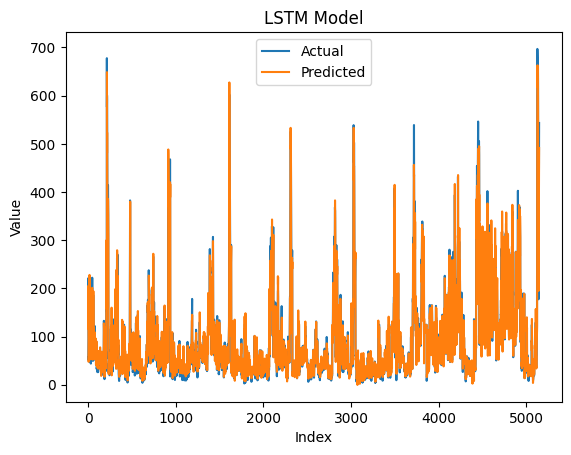

Root Mean Squared Error = 27.177003763751696
Mean Absolute Error = 13.863218785767348
R2 Score = 0.9128022830009743


In [62]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['LSTM_Prediction'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('LSTM Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_1))
print("Mean Absolute Error = " + str(mae_1))
print("R2 Score = " + str(r2_1))

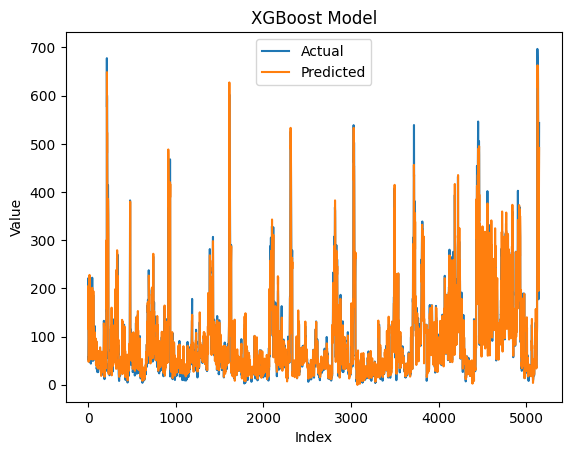

Root Mean Squared Error = 28.24243276814721
Mean Absolute Error = 14.936903020208609
R2 Score = 0.9058313872696127


In [63]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['LSTM_Prediction'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('XGBoost Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_2))
print("Mean Absolute Error = " + str(mae_2))
print("R2 Score = " + str(r2_2))

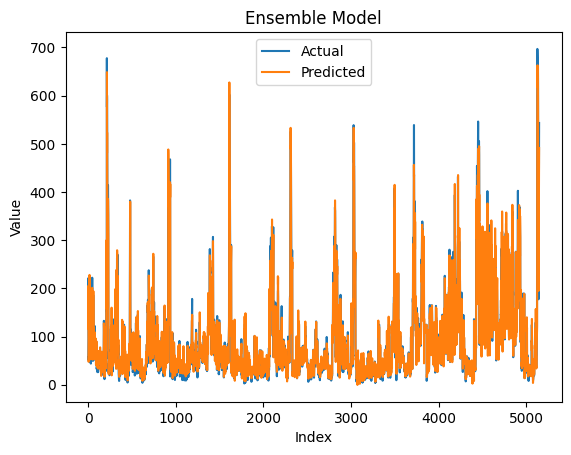

Root Mean Squared Error = 25.9949571744692
Mean Absolute Error = 13.305930085085338
R2 Score = 0.9202225449443316


In [64]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['LSTM_Prediction'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ensemble Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_combined))
print("Mean Absolute Error = " + str(mae_combined))
print("R2 Score = " + str(r2_combined))